In [ ]:
from google.colab import drive

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cur_path = "drive/MyDrive/Mafaulda_organizado"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(cur_path + '/results/run_1.csv', sep=",")

In [ ]:
df.shape

(328, 15)

In [ ]:
algorithms = ['CatBoostClassifier', 'DecisionTreeClassifier', 'LGBMClassifier', 'RandomForestClassifier', 'XGBClassifier']

In [ ]:
df = df[df['algorithm'].isin(algorithms)]

In [ ]:
df.shape

(205, 15)

In [ ]:
df.head()

category,anomaly,horizontal-misalignment,normal
variável resposta,197.0,NaN,15.0
predições,91.0,NaN,121.0
real,NaN,197.0,15.0


In [ ]:
def graph_auc():

    op_1 = pd.pivot_table(df, values='auc', index=['experiment'], columns='algorithm')

    fig = go.Figure()

    for col in op_1.columns:
        fig.add_trace(go.Scatter(x=op_1.index, y=op_1[col].values,
                                name = col,
                                mode = 'markers+lines',
                                line=dict(shape='linear'),
                                connectgaps=True

                                )
                    )

    fig.update_xaxes(type='category')
    fig.update_yaxes(range=[0.5, 1.01])

    fig.update_layout(
        autosize=True,
        width=1000,
        height=500,
        title='Mafaulda',
        xaxis_title='Experiments',
        yaxis_title='AUC')

    fig.update_layout()

    return fig

In [ ]:
def graph_f1():

    op_1 = pd.pivot_table(df, values='f1', index=['experiment'], columns='algorithm')

    fig = go.Figure()

    for col in op_1.columns:
        fig.add_trace(go.Scatter(x=op_1.index, y=op_1[col].values,
                                name = col,
                                mode = 'markers+lines',
                                line=dict(shape='linear'),
                                connectgaps=True

                                )
                    )

    fig.update_xaxes(type='category')
    fig.update_yaxes(range=[0.1, 1.02])

    fig.update_layout(
        autosize=True,
        width=1000,
        height=500,
        title='Mafaulda',
        xaxis_title='Experiments',
        yaxis_title='F1')

    fig.update_layout()

    return fig

In [ ]:
def graph_tpr():

    op_1 = pd.pivot_table(df, values='tpr', index=['experiment'], columns='algorithm')

    fig = go.Figure()

    for col in op_1.columns:
        fig.add_trace(go.Scatter(x=op_1.index, y=op_1[col].values,
                                name = col,
                                mode = 'markers+lines',
                                line=dict(shape='linear'),
                                connectgaps=True

                                )
                    )

    fig.update_xaxes(type='category')
    fig.update_yaxes(range=[0.01, 1.02])

    fig.update_layout(
        autosize=True,
        width=1000,
        height=500,
        title='Mafaulda',
        xaxis_title='Experiments',
        yaxis_title='TPR')

    fig.update_layout()

    return fig

In [ ]:
graph_auc()

In [ ]:
graph_f1()

In [ ]:
graph_tpr()

### Grafico para comparar as targets

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/5_CatBoostClassifier.csv', sep=",")

In [ ]:
df_result

,0,1,pred,target,target2
0,0.970033,0.029967,0,0,normal
1,0.982064,0.017936,0,0,normal
2,0.988377,0.011623,0,0,normal
3,0.986767,0.013233,0,0,normal
4,0.989307,0.010693,0,0,normal
...,...,...,...,...,...
508,0.004702,0.995298,1,1,vertical-misalignment
509,0.004358,0.995642,1,1,vertical-misalignment
510,0.003673,0.996327,1,1,vertical-misalignment
511,0.005637,0.994363,1,1,vertical-misalignment


In [ ]:
df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

In [ ]:
'''
for index, row in df_result.iterrows():
    if(row['pred'] == 0):
      row['final'] = 'normal'
      df_result.loc[index, 'real_target'] = 'normal'
    else:
      df_result.loc[index, 'real_target'] = row['target2']
'''


"\nfor index, row in df_result.iterrows():\n    if(row['pred'] == 0):\n      row['final'] = 'normal'\n      df_result.loc[index, 'real_target'] = 'normal'\n    else:\n      df_result.loc[index, 'real_target'] = row['target2']\n"

In [ ]:
value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
value_counts_df

,category,targets,predictions,real
0,anomaly,498.0,332.0,NaN
1,horizontal-misalignment,NaN,NaN,197.0
2,normal,15.0,181.0,15.0
3,vertical-misalignment,NaN,NaN,301.0


In [ ]:
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df = value_counts_df.transpose()

In [ ]:
value_counts_df

category,anomaly,horizontal-misalignment,normal,vertical-misalignment
targets,498.0,NaN,15.0,NaN
predictions,332.0,NaN,181.0,NaN
real,NaN,197.0,15.0,301.0


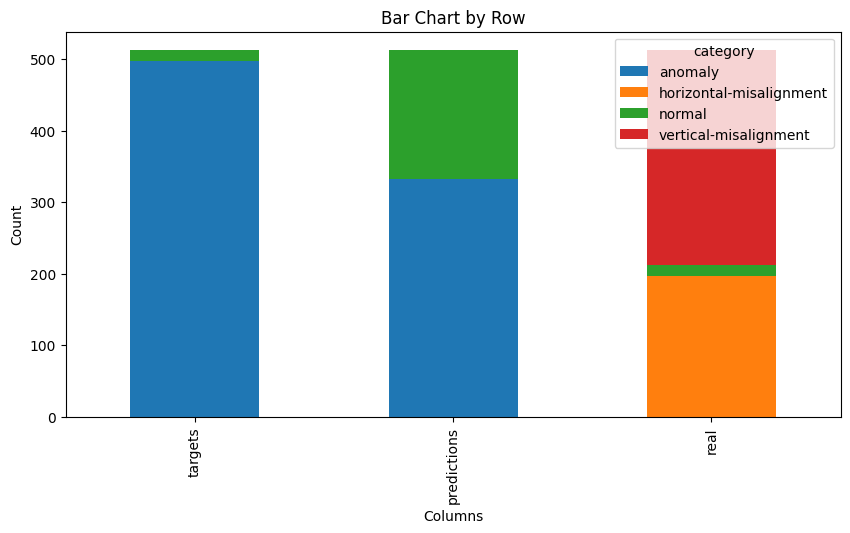

In [ ]:

# Plot the bar chart for each row
value_counts_df.plot(kind='bar', stacked=True, figsize=(10, 5))
# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Bar Chart by Row')

# Display the plot
plt.show()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/1_CatBoostClassifier.csv', sep=",")

df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df1 = value_counts_df.transpose()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/29_CatBoostClassifier.csv', sep=",")
df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df2 = value_counts_df.transpose()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/34_CatBoostClassifier.csv', sep=",")

df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df3 = value_counts_df.transpose()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/32_CatBoostClassifier.csv', sep=",")

df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df4 = value_counts_df.transpose()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/27_CatBoostClassifier.csv', sep=",")

df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'targets': df_result['target_desc'].value_counts(),
    'predictions': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df5 = value_counts_df.transpose()

In [ ]:
df_result = pd.read_csv(cur_path + '/results/proba/run_1/10_CatBoostClassifier.csv', sep=",")

df_result['pred_desc'] = df_result['pred'].apply(lambda x: 'normal' if x == 0 else 'anomaly')
df_result['target_desc'] = df_result['target'].apply(lambda x: 'normal' if x == 0 else 'anomaly')

value_counts_df = pd.DataFrame({
    'variável resposta': df_result['target_desc'].value_counts(),
    'predições': df_result['pred_desc'].value_counts(),
    'real': df_result['target2'].value_counts()
}).reset_index()

# Rename the 'index' column to match the original column names
value_counts_df = value_counts_df.rename(columns={'index': 'category'})
# Set the category as the index
value_counts_df.set_index('category', inplace=True)

# Transpose the DataFrame
value_counts_df6 = value_counts_df.transpose()

In [ ]:
value_counts_df1

category,anomaly,horizontal-misalignment,imbalance,normal,overhang,underhang,vertical-misalignment
targets,1325.0,NaN,NaN,40.0,NaN,NaN,NaN
predictions,1325.0,NaN,NaN,40.0,NaN,NaN,NaN
real,NaN,142.0,235.0,40.0,362.0,387.0,199.0


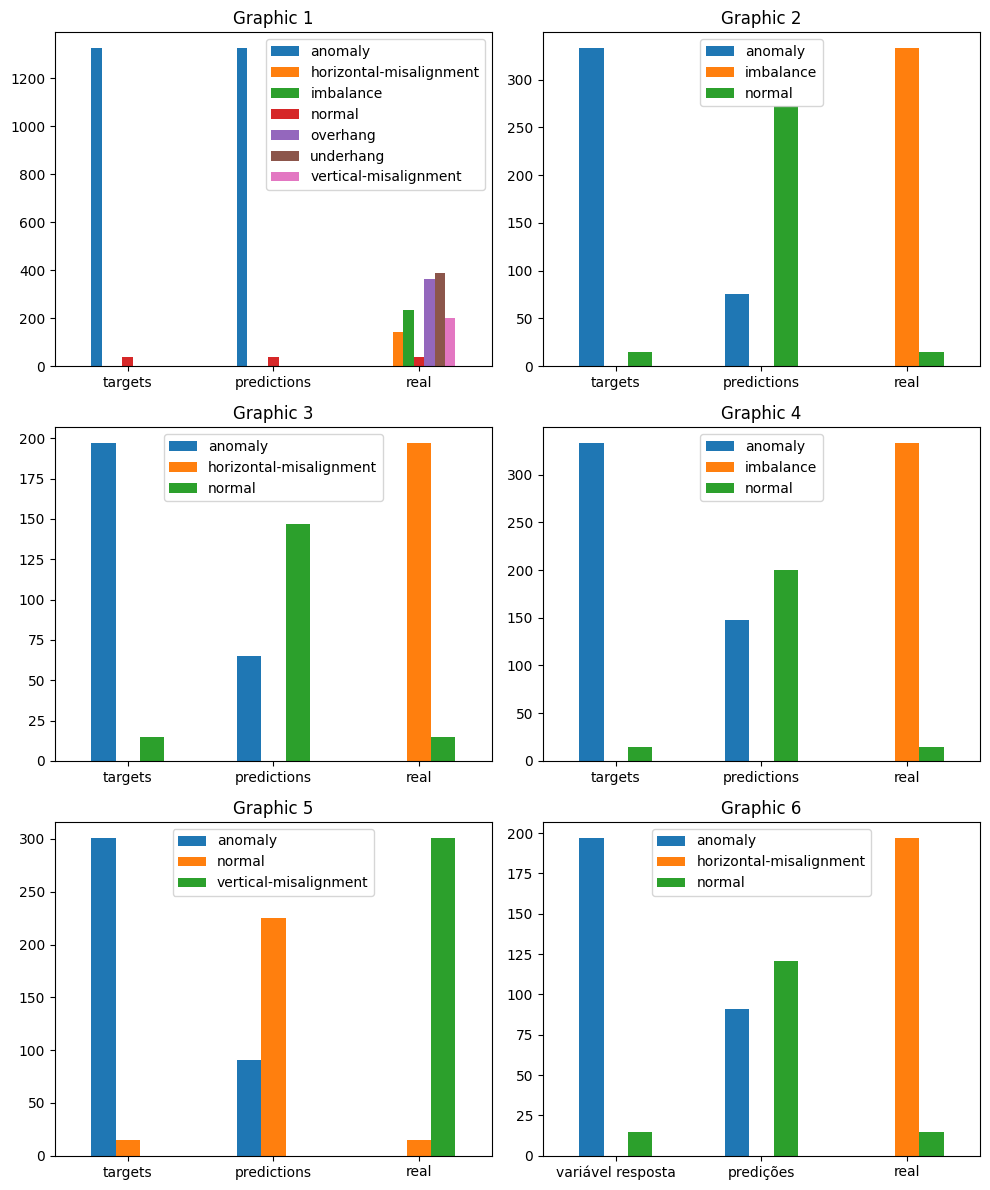

In [ ]:
dataframes = [value_counts_df1, value_counts_df2, value_counts_df3, value_counts_df4, value_counts_df5, value_counts_df6]

# Configurações da figura
fig, axs = plt.subplots(3, 2, figsize=(10, 12))  # 3 linhas, 2 colunas

# Iterar sobre os DataFrames e criar os gráficos de barras
for i, df in enumerate(dataframes):
    row = i // 2
    col = i % 2

    # Remover a coluna 'category' para evitar que ela seja plotada
    #df_plot = df.set_index('category')

    # Criar o gráfico de barras
    df.plot(kind='bar', ax=axs[row, col], rot=0)
    axs[row, col].set_title(f'Graphic {i + 1}')
    axs[row, col].legend()

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir os gráficos
plt.show()